##  UNAD

### Armando Ramires CArdozo 

### Analisis De Datos 

### Enfermedad cardíaca Cleveland UCI

## Pasos de la Actividad
1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo
5. Entrenar el modelo configurando los diferentes hiperparámetros
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos
9. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/


In [40]:
#Cargar las librerias necesrias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

from sklearn.metrics import confusion_matrix


# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import LinearRegression -> Librería para Regresión Lineal
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix




In [3]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('./heart_cleveland_upload.csv')

In [4]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(50)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

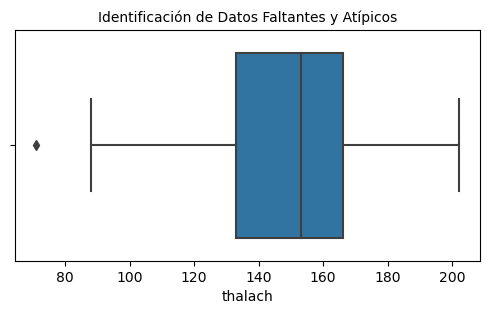

In [9]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['thalach'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [19]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en age : ",Datos['age'].isin([0]).sum())
print("Cantidad de Registros con cero en sex  ",Datos['sex'].isin([0]).sum())
print("Cantidad de Registros con cero en cp : ",Datos['cp'].isin([0]).sum())
print("Cantidad de Registros con cero en trestbps: ",Datos['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en chol: ",Datos['chol'].isin([0]).sum())

print("Cantidad de Registros con cero en restecg: ",Datos['restecg'].isin([0]).sum())
print("Cantidad de Registros con cero en thalach: ",Datos['thalach'].isin([0]).sum())
print("Cantidad de Registros con cero en exang : ",Datos['exang'].isin([0]).sum())
print("Cantidad de Registros con cero en slope : ",Datos['slope'].isin([0]).sum())


Cantidad de Registros con cero en age :  0
Cantidad de Registros con cero en sex   96
Cantidad de Registros con cero en cp :  23
Cantidad de Registros con cero en trestbps:  0
Cantidad de Registros con cero en chol:  0
Cantidad de Registros con cero en restecg:  147
Cantidad de Registros con cero en thalach:  0
Cantidad de Registros con cero en exang :  200
Cantidad de Registros con cero en slope :  139


In [42]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

Datos['slope']=Datos['slope'].replace(0,Datos['slope'].mean())
Datos['exang']=Datos['exang'].replace(0,Datos['exang'].mean())
Datos['restecg']=Datos['restecg'].replace(0,Datos['restecg'].mean())
Datos['cp']=Datos['cp'].replace(0,Datos['cp'].mean())
Datos['sex']=Datos['sex'].replace(0,Datos['sex'].mean())
print(Datos)

Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, condition]
Index: []


In [24]:
#Revisión nuevamente de datos faltantes

print("Cantidad de Registros con cero en  slope: ",Datos['slope'].isin([0]).sum())
print("Cantidad de Registros con cero en thalach: ",Datos['thalach'].isin([0]).sum())
print("Cantidad de Registros con cero en trestbps: ",Datos['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en Nivel cp: ",Datos['cp'].isin([0]).sum())
print("Cantidad de Registros con cero en age: ",Datos['age'].isin([0]).sum())

Cantidad de Registros con cero en  slope:  0
Cantidad de Registros con cero en thalach:  0
Cantidad de Registros con cero en trestbps:  0
Cantidad de Registros con cero en Nivel cp:  0
Cantidad de Registros con cero en age:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

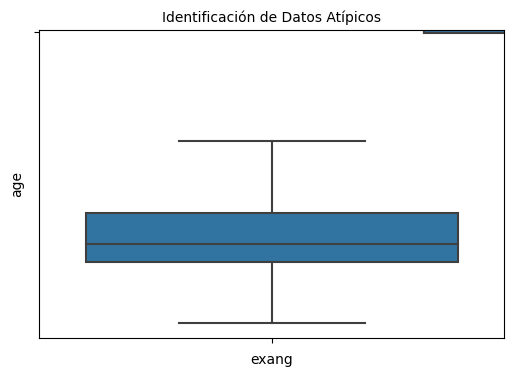

In [32]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 4,))
sns.boxplot(x=Datos['exang'])
sns.boxplot(y=Datos['age'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [38]:
nivel_minimo = 20
nivel_maximo = 800
Total_Atipicos = ((Datos['exang'] < nivel_minimo) | (Datos['exang'] > nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))


El total de datos atípicos es 297


In [41]:
# Filtra Datos Atípicos

Datos=Datos[(Datos['restecg']<nivel_maximo)&(Datos['restecg']>nivel_minimo)]
print(Datos)

Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, condition]
Index: []


In [20]:
Total_Atipicos = ((Datos['slope'] < nivel_minimo) | (Datos['slope'] > nivel_maximo)).sum()
print("El total de datos atípicos después de aplicar el filtro es {}".format(Total_Atipicos))


NameError: name 'nivel_minimo' is not defined

In [23]:
# Definir los valores de nivel mínimo y máximo
nivel_minimo = 20
nivel_maximo = 800

# Calcular el total de datos atípicos después de aplicar el filtro
Total_Atipicos = ((Datos['slope'] < nivel_minimo) | (Datos['slope'] > nivel_maximo)).sum()

# Imprimir el total de datos atípicos
print("El total de datos atípicos después de aplicar el filtro es {}".format(Total_Atipicos))

El total de datos atípicos después de aplicar el filtro es 297


In [21]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


## 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

Característica de interes:
* chol: si la persona tiene chol o no (0 = no tiene chol - 1 = si tiene chol)
* Predecir si una persona puede tener chol


In [12]:
# Total de personas con chol
Datos = pd.read_csv('./heart_cleveland_upload.csv')

Datos['chol'].value_counts()

234    6
197    6
212    5
269    5
204    5
      ..
322    1
237    1
281    1
195    1
183    1
Name: chol, Length: 152, dtype: int64

In [19]:
# Especifica el valor que deseas buscar en la columna 'chol'
valor_especifico = 126  # Por ejemplo, aquí se busca el valor 126 en la columna 'chol'

# Calcula el total de personas con el valor especificado en 'chol'
total_personas_con_chol = Datos[Datos['chol'] == valor_especifico].shape[0]

# Imprime el resultado
print("Total de personas con chol igual a {}: {}".format(valor_especifico, total_personas_con_chol))



Total de personas con chol igual a 126: 1


In [11]:


# Total de personas con chol
Datos = pd.read_csv('./heart_cleveland_upload.csv')

Datos['chol'].value_counts()

234    6
197    6
212    5
269    5
204    5
      ..
322    1
237    1
281    1
195    1
183    1
Name: chol, Length: 152, dtype: int64

In [25]:
# Mostrar los primeros 40 registros de la columna 'age'

Datos = pd.read_csv('./heart_cleveland_upload.csv')

Datos[['age']].head(40)

,age
0,69
1,69
2,66
3,65
4,64
5,64
6,63
7,61
8,60
9,59


## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo




In [ ]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('oldpeak',axis=1) # Se cargan los datos de train sin los datos de la columna Diabetico 
Y = Datos['oldpeak'] # Se cargan los datos de train con los datos de la la columna Diabetico

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [ ]:
print (X_train)

In [ ]:
print (Y_train)

# 5. Entrenar el modelo configurando los diferentes hiperparámetros

In [ ]:
# Construir el modelo de regresión logística 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
Datos = pd.read_csv('./heart_cleveland_upload.csv')

modelo_regresion = LogisticRegression(solver = "oldpeak") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación


## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, et

## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

In [ ]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

## 8. Interpretar, analizar y documentar los resultados obtenidos

Matriz de confusión: La matriz de confusión te proporciona información sobre el rendimiento del modelo de clasificación. Puedes analizar los valores en la matriz para entender cuántas predicciones se realizaron correctamente y cuántas fueron incorrectas. Por ejemplo, puedes identificar la cantidad de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos. Esto te dará una idea de la precisión y el sesgo del modelo.

Métricas de evaluación: Utiliza métricas de evaluación como la precisión, la sensibilidad, la especificidad y el puntaje F1 para obtener una comprensión más completa del rendimiento del modelo. Estas métricas te ayudarán a evaluar cómo el modelo se desempeña en diferentes aspectos, como la capacidad para predecir correctamente las clases positivas y negativas, así como su equilibrio entre precisión y exhaustividad.

Análisis de características importantes: Si has realizado selección de características o tienes coeficientes de características del modelo, examina qué características tienen un mayor impacto en las predicciones del modelo. Esto puede ayudarte a comprender qué características son más relevantes para la tarea de predicción y pueden proporcionar información útil para la toma de decisiones.

Visualización de resultados: Utiliza gráficos y visualizaciones para comunicar los resultados de manera efectiva. Por ejemplo, puedes crear gráficos de barras o gráficos de dispersión para comparar las predicciones del modelo con los valores reales. También puedes utilizar curvas ROC o curvas de precisión-recuperación para evaluar el rendimiento del modelo en diferentes umbrales de clasificación.

Documentación clara y concisa: Documenta tus resultados de manera clara y concisa, incluyendo las conclusiones clave, las limitaciones del modelo y cualquier recomendación para futuras investigaciones o mejoras. Asegúrate de comunicar tus hallazgos de manera accesible para que otros puedan entender y utilizar tus resultados.

## 9. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/
